# Internals - Basics

Here we are trying to learn basics of deep learning with image classification as an example.

## Load some dataset

For first, we need a dataset. For that, we are going to use the `MNIST` dataset. (Acutally we are using a subset of that)

In [1]:
from fastai2.vision.all import *
from utils import *

matplotlib.rc('image', cmap='Greys')

In [2]:
images_path = untar_data(URLs.MNIST_SAMPLE)
images_path

Path('/storage/data/mnist_sample')

In [3]:
images_path.ls()

(#3) [Path('/storage/data/mnist_sample/labels.csv'),Path('/storage/data/mnist_sample/valid'),Path('/storage/data/mnist_sample/train')]

In [4]:
(images_path/"train").ls()

(#2) [Path('/storage/data/mnist_sample/train/7'),Path('/storage/data/mnist_sample/train/3')]

In [5]:
(images_path/"train"/"3").ls()

(#6131) [Path('/storage/data/mnist_sample/train/3/26208.png'),Path('/storage/data/mnist_sample/train/3/12882.png'),Path('/storage/data/mnist_sample/train/3/58219.png'),Path('/storage/data/mnist_sample/train/3/13242.png'),Path('/storage/data/mnist_sample/train/3/53225.png'),Path('/storage/data/mnist_sample/train/3/51947.png'),Path('/storage/data/mnist_sample/train/3/57974.png'),Path('/storage/data/mnist_sample/train/3/9812.png'),Path('/storage/data/mnist_sample/train/3/6658.png'),Path('/storage/data/mnist_sample/train/3/11285.png')...]

In [6]:
three_paths = (images_path/"train"/"3").ls().sorted()
seven_paths = (images_path/"train"/"7").ls().sorted()

In [7]:
seven_paths

(#6265) [Path('/storage/data/mnist_sample/train/7/10002.png'),Path('/storage/data/mnist_sample/train/7/1001.png'),Path('/storage/data/mnist_sample/train/7/10014.png'),Path('/storage/data/mnist_sample/train/7/10019.png'),Path('/storage/data/mnist_sample/train/7/10039.png'),Path('/storage/data/mnist_sample/train/7/10046.png'),Path('/storage/data/mnist_sample/train/7/10050.png'),Path('/storage/data/mnist_sample/train/7/10063.png'),Path('/storage/data/mnist_sample/train/7/10077.png'),Path('/storage/data/mnist_sample/train/7/10086.png')...]

In [8]:
im_seven = Image.open(seven_paths[10])
im_seven

## Converting Image into Data

To do something interesting, we need to convert these images into data.

In [9]:
## This is the numpy array.
array(im_seven).shape

(28, 28)

In [10]:
## This is same thing but with pytorch. So, we will be using that from now on.
tsr_seven = tensor(im_seven)
tsr_seven.shape

torch.Size([28, 28])

In [11]:
## This image is 2 dimention array (or a 2D matrix)
## Let's play with that.

In [12]:
# This is the 10th row
tsr_seven[9,:]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,  15,  89, 254, 254, 254, 197,  32,   0,   0,   0,  76, 254, 140,   0,   0,   0,   0,   0,   0,   0], dtype=torch.uint8)

In [13]:
# This the 15th column
tsr_seven[:, 14]

tensor([  0,   0,   0,   0,   0,   0,   0,  98, 249,  32,   0,   0,   0,   0,   0,   0, 127, 244, 254, 235, 102,  18,   0,   0,   0,   0,   0,   0], dtype=torch.uint8)

In [14]:
# This is rows 10 and 11
tsr_seven[9:11, :]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,  15,  89, 254, 254, 254, 197,  32,   0,   0,   0,  76, 254, 140,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  15, 155, 254, 254, 187,  32,   5,   0,   0,   0,  15, 197, 243,  34,   0,   0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [15]:
# This is rows 10 to 12 and colum 10 to 15
tsr_seven[9:11, 9:14]

tensor([[ 89, 254, 254, 254, 197],
        [254, 254, 187,  32,   5]], dtype=torch.uint8)

In [16]:
# Let's visualize one of those tensors
show_image(tsr_seven[:, 10:15])

## Baseline Model

Here our idea is to create a model to detect 3 and 7 from our dataset. Before we are trying to do anything fancy, we need to create easy to create model. It should easy to create.

Then we can compare our future fancy model with this baseline and see whether it's an improvement or not.

In [18]:
lst_threes = [tensor(Image.open(p)) for p in three_paths]
lst_sevens = [tensor(Image.open(p)) for p in seven_paths]

In [19]:
lst_threes[1].shape

torch.Size([28, 28])

As you see the output is a list of tensors. 

**But in order to work with pytorch, we need to get convert them into a tensor.**

In [24]:
## We also make those values from 0-1 range. That's the usual way we work with images.
tsr_threes = torch.stack(lst_threes).float()/255
tsr_sevens = torch.stack(lst_sevens).float()/255

In [25]:
tsr_sevens.shape

torch.Size([6265, 28, 28])

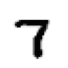

In [29]:
show_image(tsr_sevens[0])

As you can see, now we moved all of our images into a tensor. So, we can work on it.

### Mean Image

In order to finish our baseline model, we will be get the mean of these stackes images and compare them with each of the image.

So, first we need to get the mean image. Here's how we do that

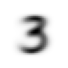

In [36]:
tsr_mean_threes = tsr_threes.mean(0)
show_image(tsr_mean_threes)

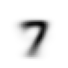

In [37]:
tsr_mean_sevens = tsr_sevens.mean(0)
show_image(tsr_mean_sevens)